In [1]:
import tensorflow as tf

c:\users\ve032674\appdata\local\continuum\anaconda3\envs\tensorflow1\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
c:\users\ve032674\appdata\local\continuum\anaconda3\envs\tensorflow1\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [ ]:
# if you type mnist. and press tab, you can see all the different folders in there

# mnist.

In [9]:
mnist.train.images.shape #55000 examples which are 784 pixels each

(55000, 784)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# This label shows that for the second image, it is a 3
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [12]:
mnist.train.images[1].shape

(784,)

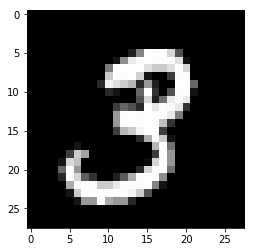

In [15]:
# 784 is a single vector of pixels, which is composed by a 28 * 28 picture

plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')

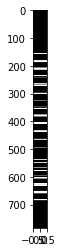

In [21]:
# This shows what the vector looks like (a little bit stretched for visability) and is what is 
# passsed through the tensor
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=.02)

In [22]:
x = tf.placeholder(tf.float32, shape=[None,784]) #The shape is the batch size of none.

In [23]:
W = tf.Variable(tf.zeros([784,10]))
#784 represents the pixels, and 10 represents the different options...0-9

In [24]:
b = tf.Variable(tf.zeros([10]))
#This is the bias

In [25]:
#This is the testing data set
y = tf.matmul(x,W) + b

In [33]:
# This is the labeled data set. There is a series of 10 numbers, all 0 but 1, in the index
# of the value it is representing
y_true = tf.placeholder(tf.float32,shape=[None,10]) 

In [34]:
# How to define the error
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))

In [35]:
# Method on how to reduce the error through learning rate. The slower the learning rate, the more accurate the model
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)

In [36]:
train = optimizer.minimize(cross_entropy)

In [37]:
init = tf.global_variables_initializer()

In [44]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000): #this means run it for 1000 steps
        
        #mnist has a build in function that allows you to select the batch size, not all datasets have this function
        batch_x, batch_y = mnist.train.next_batch(100) # this means run each batch as 100 large
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9154
